In [43]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'MS Gothic'
plt.rcParams['axes.unicode_minus'] = False

# CSVファイルからデータセットを読み込む
csv_file_path = 'emdat.csv'  # CSVファイルのパスに置き換えてください
emdat = pd.read_csv(csv_file_path)

# データセットの最初の数行を表示
emdat.head()

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


## Examples

### **チャレンジ 1: 国ごとの死亡者数を可視化**
- **内容**: 指定した国の災害データを使用し、災害タイプごとの死亡者数を棒グラフで可視化する関数を作成してください。

### **チャレンジ 2: 2つの国の死亡者数を比較**
- **内容**: 指定した2つの国の死亡者数を災害タイプごとに比較する関数を作成してください。

### **チャレンジ 3: 最も致命的な災害トップNを可視化**
- **内容**: 死亡者数が多い順に、最も致命的な災害を上位N件（例: トップ5）可視化する関数を作成してください。

### **チャレンジ 4: 特定の年範囲での死亡者数を可視化**
- **内容**: 特定の年範囲（例: 2000年から2010年）の死亡者数を可視化する関数を作成してください。

### **チャレンジ 5: カスタム可視化を作成**
- **内容**: 学生自身でユニークな関数を作成し、以下のような条件でデータを可視化してください。
  - 複数のパラメータ（例えば、国と災害タイプ）を組み合わせた可視化。
  - 特定の条件を満たすデータ（例: 死亡者数が1,000以上）を強調表示する。



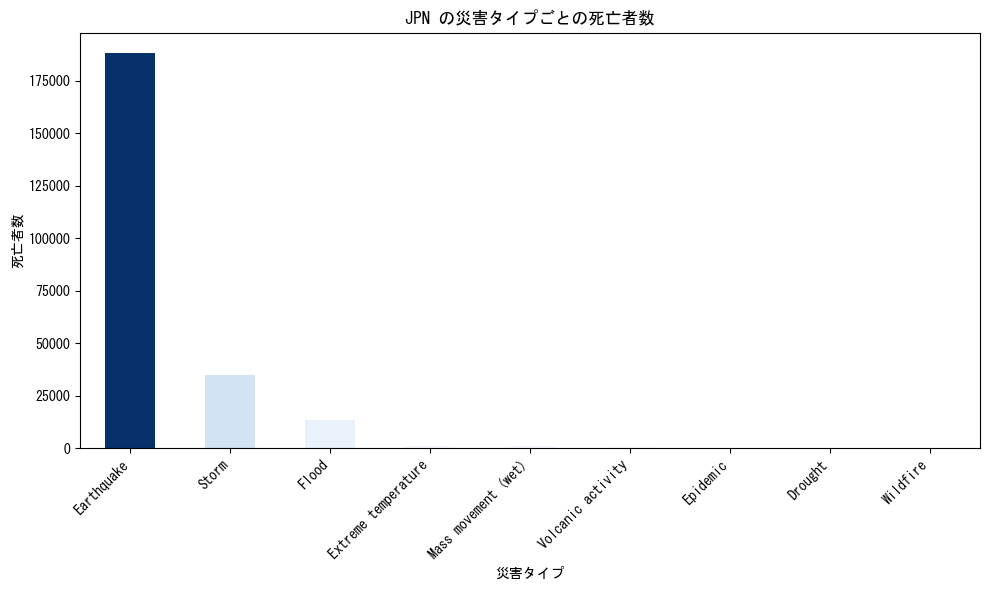

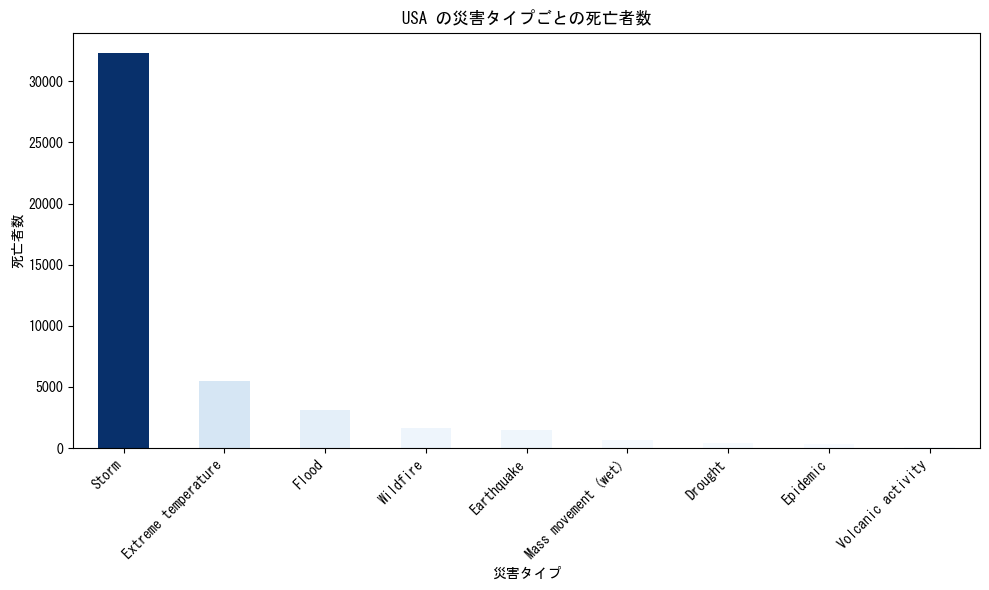

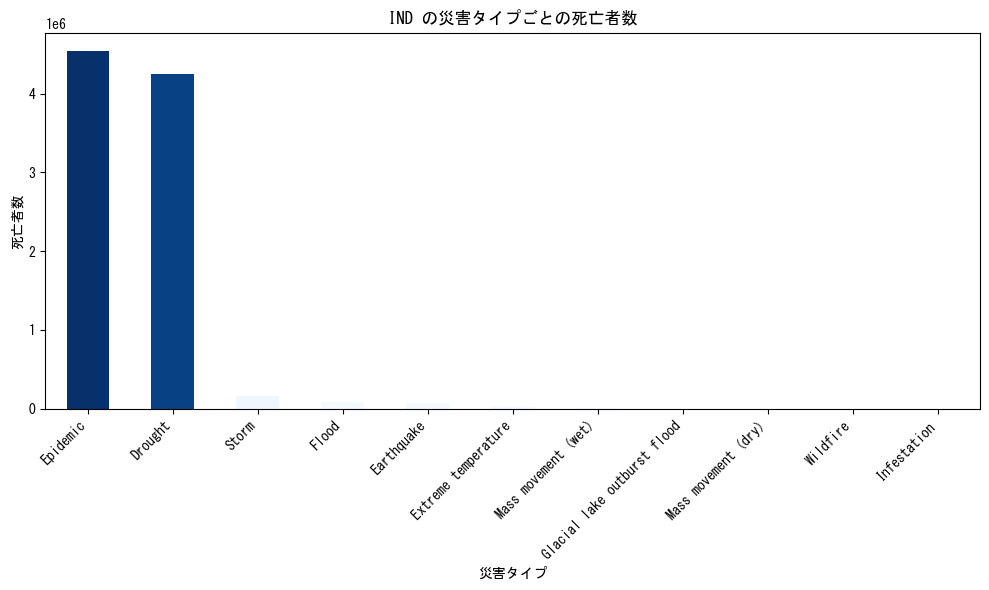

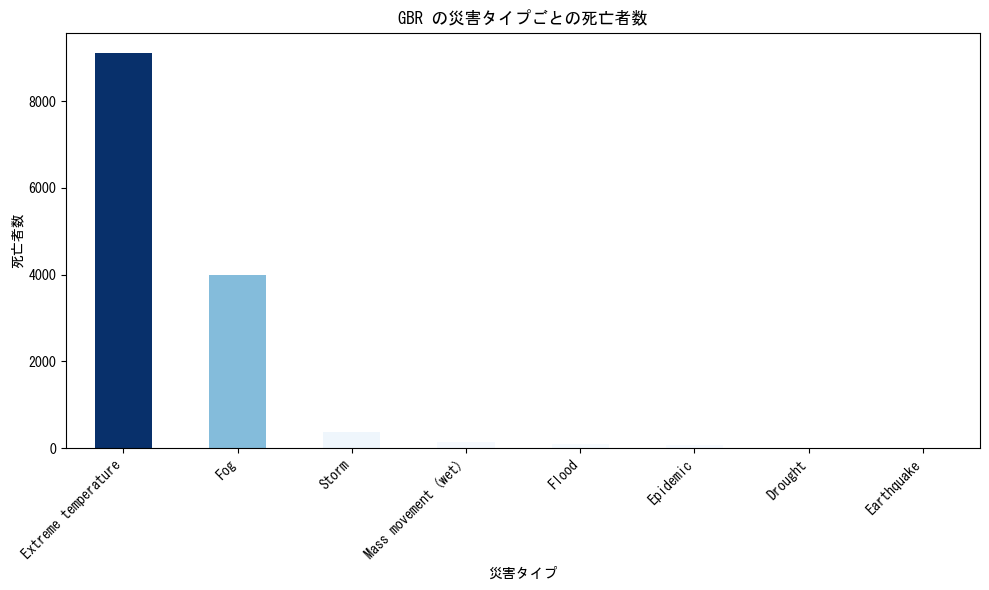

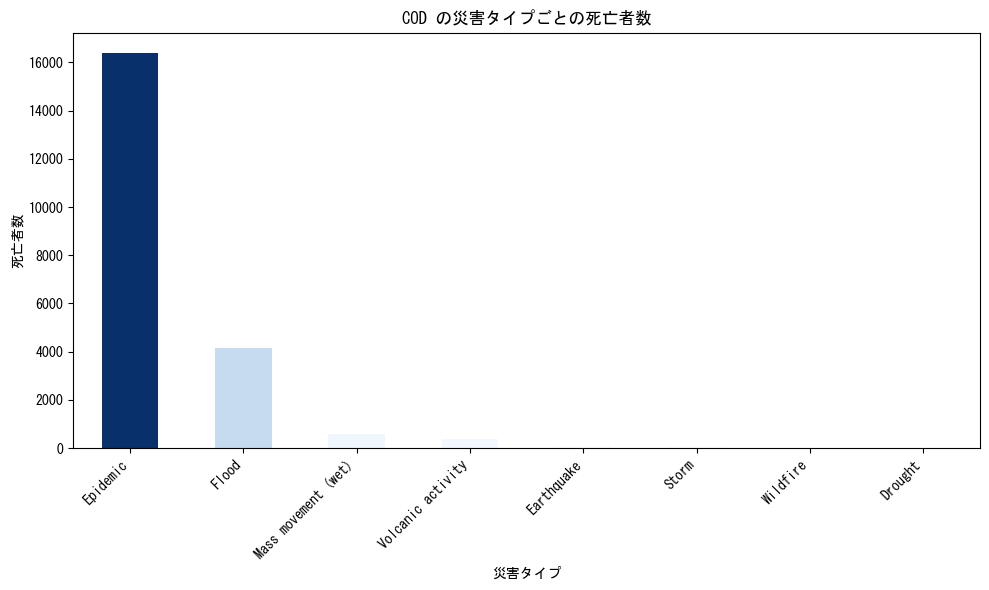

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.rcParams['font.family'] = 'MS Gothic'  # 日本語対応

def plot_multiple_countries_disaster_deaths_gradient(csv_file, iso_codes):
    """
    複数の国の災害タイプごとの死亡者数を棒グラフで表示し、
    最大値を濃い青にしたグラデーションカラーを適用
    
    Parameters:
    csv_file: str - 災害データCSVファイル
    iso_codes: list - ISO国コードのリスト
    """
    df = pd.read_csv(csv_file)
    
    for iso in iso_codes:
        country_df = df[df['ISO'] == iso]
        
        if country_df.empty:
            print(f"{iso} のデータが見つかりません")
            continue
        
        deaths_by_type = country_df.groupby('Disaster Type')['Total Deaths'].sum().sort_values(ascending=False)
        
        # グラデーションカラー作成
        norm = mcolors.Normalize(vmin=deaths_by_type.min(), vmax=deaths_by_type.max())
        cmap = plt.cm.Blues  # 青系カラーマップ
        colors = [cmap(norm(value)) for value in deaths_by_type]
        
        # 棒グラフ作成
        plt.figure(figsize=(10,6))
        deaths_by_type.plot(kind='bar', color=colors)
        plt.title(f"{iso} の災害タイプごとの死亡者数")
        plt.xlabel("災害タイプ")
        plt.ylabel("死亡者数")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# 使用例
csv_file = "emdat.csv"
iso_codes = ['JPN', 'USA', 'IND', 'GBR', 'COD']
plot_multiple_countries_disaster_deaths_gradient(csv_file, iso_codes)


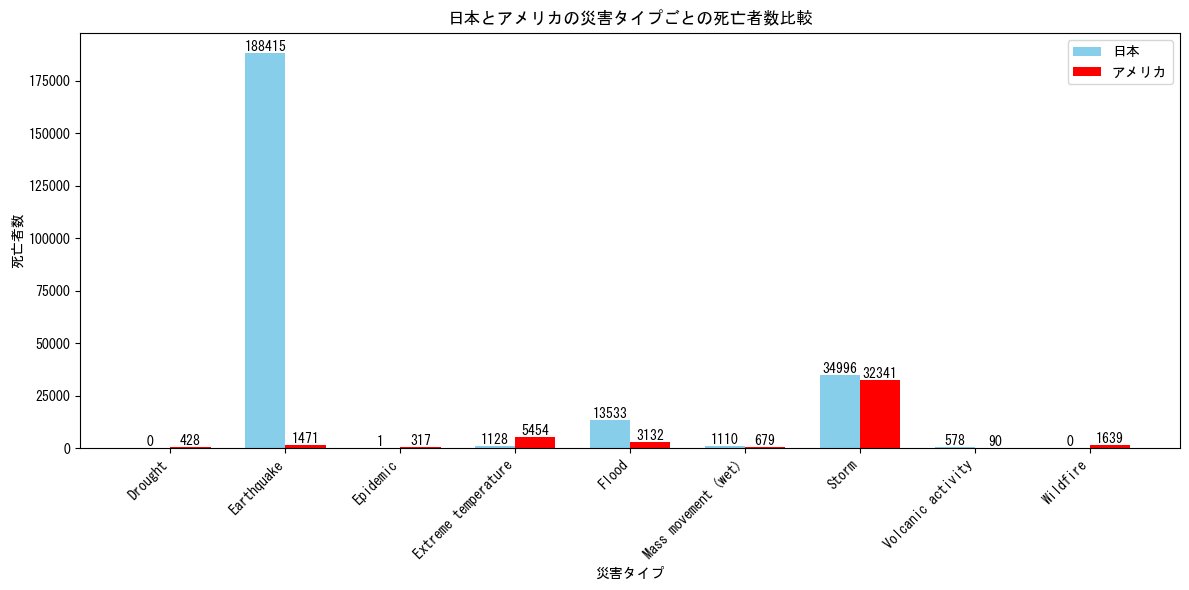

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'MS Gothic'  # 日本語対応

def compare_jpn_usa_disaster_deaths_with_labels(csv_file):
    """
    日本(JPN)とアメリカ(USA)の災害タイプごとの死亡者数を比較し、
    棒の上に数値を表示する関数
    """
    df = pd.read_csv(csv_file)
    
    # 国ごとのデータ
    df_jpn = df[df['ISO'] == 'JPN'].groupby('Disaster Type')['Total Deaths'].sum()
    df_usa = df[df['ISO'] == 'USA'].groupby('Disaster Type')['Total Deaths'].sum()
    
    # 災害タイプの統合
    all_disasters = sorted(set(df_jpn.index) | set(df_usa.index))
    df_jpn = df_jpn.reindex(all_disasters, fill_value=0)
    df_usa = df_usa.reindex(all_disasters, fill_value=0)
    
    # 棒グラフ作成
    x = np.arange(len(all_disasters))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(12,6))
    bars_jpn = ax.bar(x - width/2, df_jpn.values, width, label='日本', color='skyblue')
    bars_usa = ax.bar(x + width/2, df_usa.values, width, label='アメリカ', color='red')
    
    # 棒の上に数値を表示
    for bar in bars_jpn:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 5, f'{int(height)}', ha='center', va='bottom')
        
    for bar in bars_usa:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 5, f'{int(height)}', ha='center', va='bottom')
    
    ax.set_xlabel("災害タイプ")
    ax.set_ylabel("死亡者数")
    ax.set_title("日本とアメリカの災害タイプごとの死亡者数比較")
    ax.set_xticks(x)
    ax.set_xticklabels(all_disasters, rotation=45, ha='right')
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# 使用例
csv_file = "emdat.csv"
compare_jpn_usa_disaster_deaths_with_labels(csv_file)


【死者数トップ10の災害】
           Country  Start Year Disaster Type  Total Deaths
287          China        1931         Flood     3700000.0
255          China        1928       Drought     3000000.0
134   Soviet Union        1917      Epidemic     2500000.0
155          India        1920      Epidemic     2000000.0
847          China        1959         Flood     2000000.0
457     Bangladesh        1943       Drought     1900000.0
1147         India        1965       Drought     1500000.0
441          India        1942       Drought     1500000.0
60           China        1909      Epidemic     1500000.0
54           India        1907      Epidemic     1300000.0


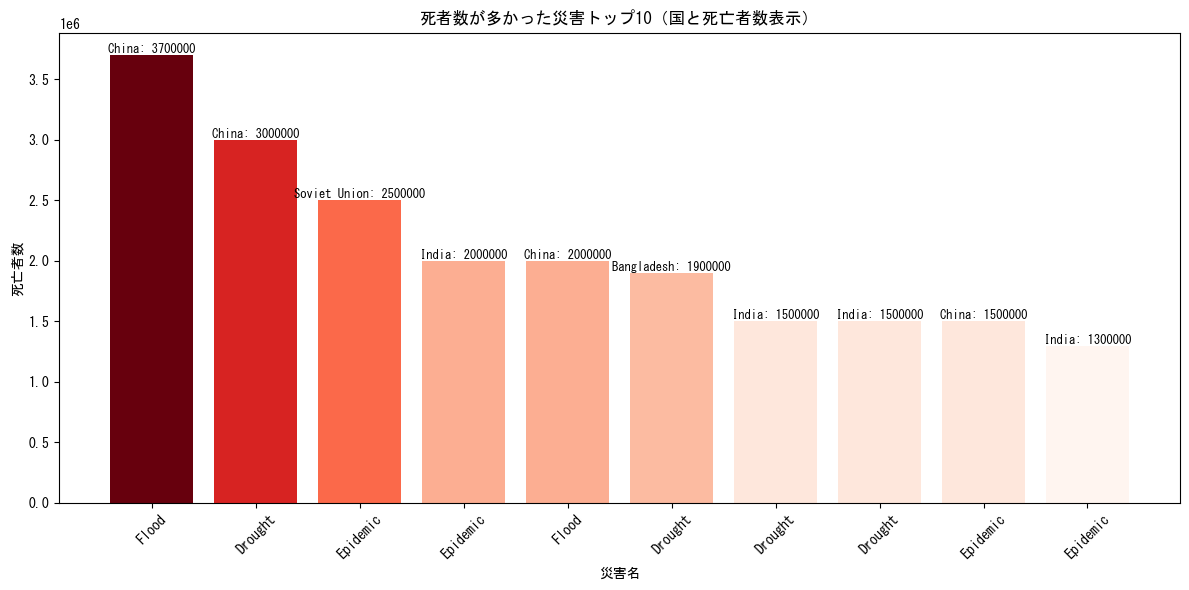

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.rcParams['font.family'] = 'MS Gothic'

df = pd.read_csv("emdat.csv")

# 死者数トップ10
df_deaths = df[df["Total Deaths"].notnull()]
deaths_top = df_deaths.sort_values("Total Deaths", ascending=False).head(10)

print("【死者数トップ10の災害】")
print(deaths_top[["Country", "Start Year", "Disaster Type", "Total Deaths"]])

# 赤のグラデーションカラーを作成
norm = mcolors.Normalize(vmin=deaths_top["Total Deaths"].min(), vmax=deaths_top["Total Deaths"].max())
cmap = plt.cm.Reds
colors = [cmap(norm(val)) for val in deaths_top["Total Deaths"]]

plt.figure(figsize=(12,6))
bars = plt.bar(range(10), deaths_top["Total Deaths"], color=colors)

# 棒の上に「国名: 死者数」を表示
for bar, country, deaths in zip(bars, deaths_top["Country"], deaths_top["Total Deaths"]):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 50,  # 棒の上に少し余白
        f"{country}: {int(deaths)}",
        ha='center',
        va='bottom',
        fontsize=9
    )

# 災害名をX軸ラベルに
plt.xticks(range(10), deaths_top["Disaster Type"], rotation=45)
plt.title("死者数が多かった災害トップ10（国と死亡者数表示）")
plt.xlabel("災害名")
plt.ylabel("死亡者数")

plt.tight_layout()
plt.show()


C:\Users\gtbao\AppData\Local\Temp\ipykernel_9940\1399996558.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



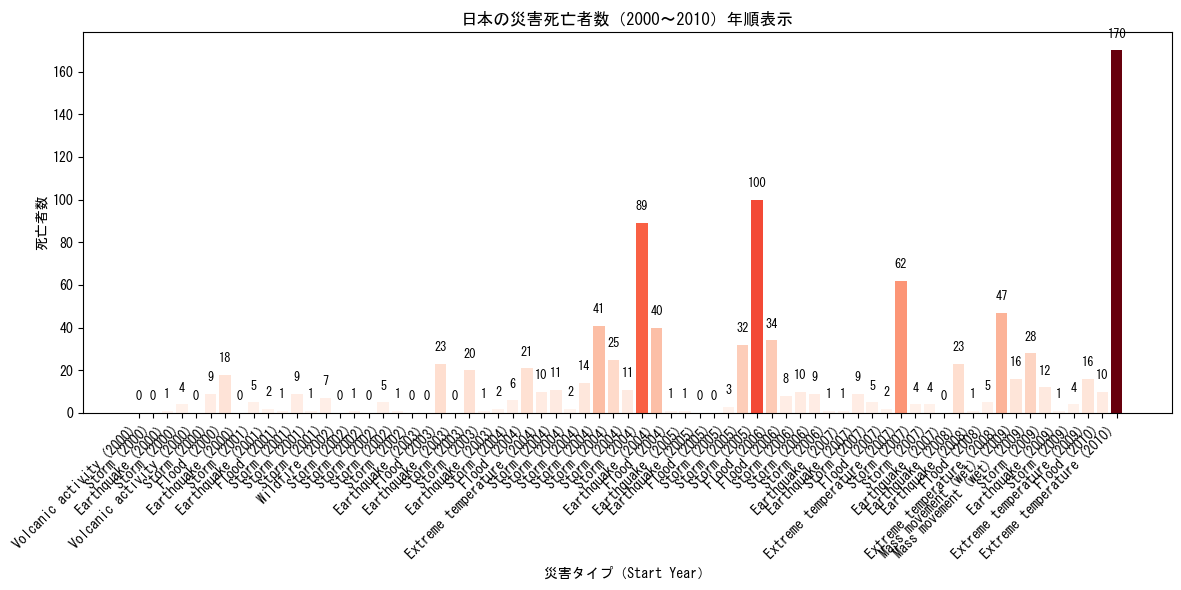

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.rcParams['font.family'] = 'MS Gothic'

def plot_japan_deaths_by_start_year(csv_file, start_year, end_year):
    """
    日本の特定年範囲の災害死亡者数を Start Year 順で可視化
    NaNは0として扱う
    """
    df = pd.read_csv(csv_file)
    
    # 日本に絞り、年範囲でフィルタ
    df_jpn = df[(df['ISO'] == 'JPN') & (df['Start Year'] >= start_year) & (df['Start Year'] <= end_year)]
    
    if df_jpn.empty:
        print(f"{start_year}～{end_year}の日本の災害データが見つかりません")
        return
    
    # Total Deaths の NaN を 0 に置換
    df_jpn['Total Deaths'] = df_jpn['Total Deaths'].fillna(0)
    
    # Start Year順でソート
    df_jpn_sorted = df_jpn.sort_values("Start Year")
    
    # 赤のグラデーションカラー
    norm = mcolors.Normalize(vmin=df_jpn_sorted["Total Deaths"].min(), vmax=df_jpn_sorted["Total Deaths"].max())
    cmap = plt.cm.Reds
    colors = [cmap(norm(val)) for val in df_jpn_sorted["Total Deaths"]]
    
    plt.figure(figsize=(12,6))
    bars = plt.bar(
        range(len(df_jpn_sorted)),
        df_jpn_sorted["Total Deaths"],
        color=colors
    )
    
    # 棒の上に死亡者数を表示
    for bar, deaths in zip(bars, df_jpn_sorted["Total Deaths"]):
        plt.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + 5,
            f"{int(deaths)}",
            ha='center',
            va='bottom',
            fontsize=9
        )
    
    # X軸ラベルに災害タイプと Start Year を表示
    labels = [f"{row['Disaster Type']} ({int(row['Start Year'])})" for _, row in df_jpn_sorted.iterrows()]
    plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
    
    plt.title(f"日本の災害死亡者数（{start_year}～{end_year}）年順表示")
    plt.xlabel("災害タイプ（Start Year）")
    plt.ylabel("死亡者数")
    plt.tight_layout()
    plt.show()

# 使用例
csv_file = "emdat.csv"
plot_japan_deaths_by_start_year(csv_file, 2000, 2010)
